# Retail Sales Dataset — EDA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


In [7]:
CSV_PATH = "retail_sales_dataset.csv"

df = pd.read_csv(CSV_PATH)
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
df.shape


(1000, 9)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
df.isnull().sum()


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


## Standardize columns

In [11]:
def standardize_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.rename(columns={c: c.strip() for c in df.columns})
    lower_map = {c.lower(): c for c in df.columns}

    def pick(*candidates):
        for cand in candidates:
            key = cand.lower()
            if key in lower_map:
                return lower_map[key]
        return None

    rename_map = {}

    date_col = pick("Date", "Order Date", "InvoiceDate", "Invoice Date", "Transaction Date", "Purchase Date")
    if date_col and date_col != "Date":
        rename_map[date_col] = "Date"

    amt_col = pick("Amount", "Amount (USD)", "Revenue", "Total", "Total Amount", "Sales", "TotalPrice", "Total Price")
    if amt_col and amt_col != "Amount":
        rename_map[amt_col] = "Amount"

    qty_col = pick("Boxes Shipped", "Quantity", "Units Sold", "Units", "Qty")
    if qty_col and qty_col != "Boxes Shipped":
        rename_map[qty_col] = "Boxes Shipped"

    country_col = pick("Country", "Country/Region", "Region", "Location")
    if country_col and country_col != "Country":
        rename_map[country_col] = "Country"

    sp_col = pick("Sales Person", "Salesperson", "Sales Person Name", "Employee", "Staff", "Agent")
    if sp_col and sp_col != "Sales Person":
        rename_map[sp_col] = "Sales Person"

    prod_col = pick("Product", "Item", "Description", "Product Name", "Category")
    if prod_col and prod_col != "Product":
        rename_map[prod_col] = "Product"

    return df.rename(columns=rename_map)

df = standardize_columns(df)
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Boxes Shipped,Price per Unit,Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Type conversion

In [12]:
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

if "Amount" in df.columns:
    df["Amount"] = (
        df["Amount"]
        .astype(str)
        .str.replace(r"[^0-9.\-]", "", regex=True)
        .replace("", np.nan)
        .astype(float)
    )

df.dtypes


/tmp/ipython-input-372154107.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")


,0
Transaction ID,int64
Date,datetime64[ns]
Customer ID,object
Gender,object
Age,int64
Product Category,object
Boxes Shipped,int64
Price per Unit,int64
Amount,float64


## Visualizations

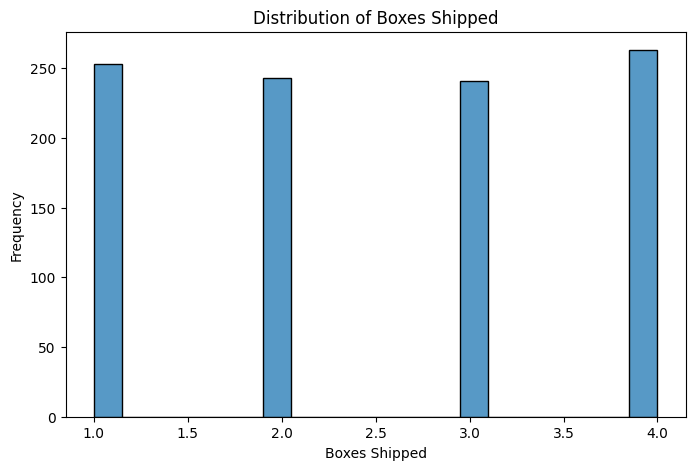

In [13]:
if "Boxes Shipped" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df["Boxes Shipped"], bins=20)
    plt.title("Distribution of Boxes Shipped")
    plt.xlabel("Boxes Shipped")
    plt.ylabel("Frequency")
    plt.show()


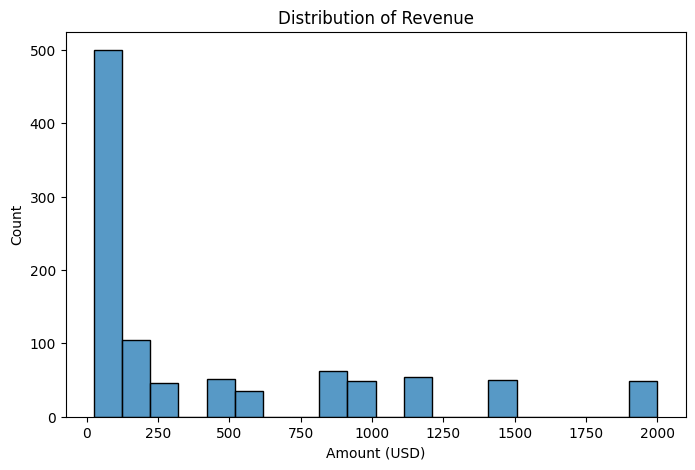

In [14]:
if "Amount" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df["Amount"], bins=20)
    plt.title("Distribution of Revenue")
    plt.xlabel("Amount (USD)")
    plt.ylabel("Count")
    plt.show()


## Aggregations

In [15]:
if set(["Country", "Amount"]).issubset(df.columns):
    country_revenue = df.groupby("Country")["Amount"].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    country_revenue.plot(kind="bar")
    plt.title("Total Revenue by Country")
    plt.ylabel("Revenue")
    plt.show()

    country_revenue.head(10)


In [16]:
if set(["Sales Person", "Amount"]).issubset(df.columns):
    salesperson_revenue = df.groupby("Sales Person")["Amount"].sum().sort_values(ascending=False)
    salesperson_revenue.head(10)


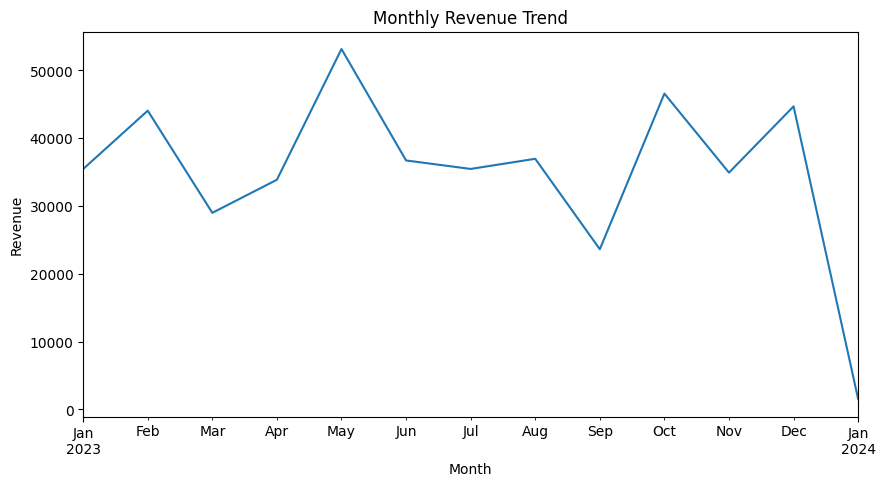

In [17]:
if set(["Date", "Amount"]).issubset(df.columns):
    df["Month"] = df["Date"].dt.to_period("M")
    monthly_revenue = df.groupby("Month")["Amount"].sum()

    plt.figure(figsize=(10, 5))
    monthly_revenue.plot()
    plt.title("Monthly Revenue Trend")
    plt.ylabel("Revenue")
    plt.show()

    monthly_revenue.tail(12)


## Descriptive statistics

In [18]:
df.describe(include="all").T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Transaction ID,1000.0,NaN,NaN,NaN,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
Date,1000,NaN,NaN,NaN,2023-07-03 00:25:55.200000256,2023-01-01 00:00:00,2023-04-08 00:00:00,2023-06-29 12:00:00,2023-10-04 00:00:00,2024-01-01 00:00:00,NaN
Customer ID,1000,1000,CUST1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,41.392,18.0,29.0,42.0,53.0,64.0,13.68143
Product Category,1000,3,Clothing,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boxes Shipped,1000.0,NaN,NaN,NaN,2.514,1.0,1.0,3.0,4.0,4.0,1.132734
Price per Unit,1000.0,NaN,NaN,NaN,179.89,25.0,30.0,50.0,300.0,500.0,189.681356
Amount,1000.0,NaN,NaN,NaN,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632
Month,1000,13,2023-05,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
